In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
import gp
importlib.reload(gp)
from gp import *
import pandas as pd


In [2]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


In [3]:
gp = GP(M=500, max_depth=50, prob_node_symb=0.3, depth_penalty=0.005)
res = gp.execute(x,y, generations=50)
res

Progress: 100%|██████████| 50/50 [00:27<00:00,  1.82it/s]


{'total_generations': 50,
 'best_trees': array([Node(mul), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div)], dtype=object),
 'best_fitness': array([329.55115632, 192.11175987, 192.11175987, 190.22831124,
        190.22831124, 190.22831124, 190.22831124, 190.22831124,
        190.22831124, 190.22831124, 190.22831124, 190.22831124,
        190.22831124,   4.01928359,   4.01928359,   4.01928359,
          4.01928359,   4.01928359,   4

In [4]:
res["best_trees"][-1].sympify_str()

ValueError: The argument '0.9226554074878334*I' is not comparable.

In [5]:
(res["best_trees"][-1]).pprint()


  div____________________________________________________________________________________________________________________________
 /                                                                                                                               \
x                                                                                                    ____________________________log
                                                                                                    /
                                                                                                 _add______________________
                                                                                                /                          \
                                 _____________________________________________________________inv                __________mul
                                /                                                                               /             \

In [6]:
#arbol = "div(x,log(sub(mul(div(inv(log(inv(log(0.4981859242141673)))),mul(inv(log(0.4981859242141673)),log(log(inv(0.4981859242141673))))),log(x)),div(x,div(inv(log(inv(0.4981859242141673))),mul(inv(log(inv(0.4981859242141673))),log(0.7107532914770232)))))))"
#sympy.sympify(arbol,locals=SYMPY_FUNC_CONVERTER)
#arbol.sympify_str()

div(x,log(add(inv(min(log(0.48126674753855725),min(sqrt(x),max(-0.4696220072496933,sqrt(-0.8512930009665398))))),mul(-0.34414078519937563,x))))


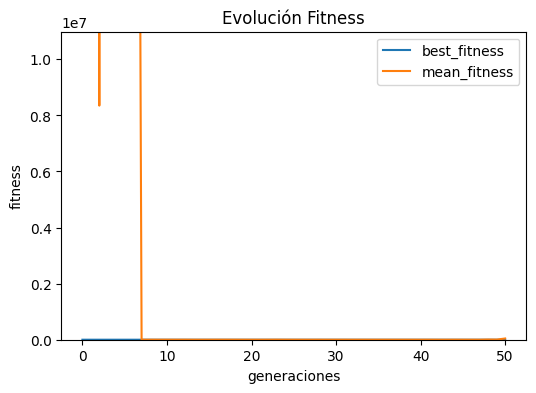

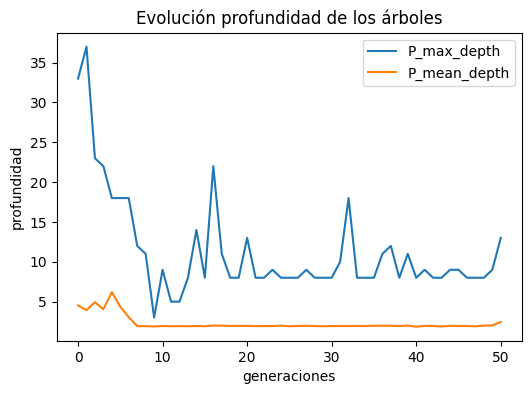

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.ylim(0,res['mean_fitness'][5])
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()
print(res['best_trees'][-1])